In [705]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Handles warnings

import warnings
warnings.filterwarnings('ignore')

In [707]:
#reading the data
bike=pd.read_csv("day.csv")

In [709]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [711]:
# Checking the info of the dataset
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [713]:
# Checking the descriptive statistics of the dataframe
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [715]:
# Checking the shape of the dataframe
bike.shape

(730, 16)

**From the above steps bike.info and bike.shape we can conclude we have 730 rows in the data frame and all are not null**

**Checking null values present in each of the columns and calculating the percentage of it.**

In [719]:
null_value_cols=bike.isnull().mean()*100

In [721]:
null_value_cols

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

**As we can see there are no null values in the columns**

**From the above 2 steps we can conclude there are no null values in both rows as well as columns**

## Removing the redundant data

**instant** : This is index of the row, we can delete this column.

**dteday** : As we have already yr and mnth variables in the data set, we no need to have this column, so we can remove this column.

**casual & registered** : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns. More over, we have created a new variable to have the ratio of these customer types.

In [727]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [729]:
# Mapping back all the categorical values
mapping = {1:"spring", 2:"summer", 3:"fall", 4:"winter"}
bike["season"]=bike["season"].map(mapping)
mapping1 = {1:"Clear", 2:"Mist", 3:"Light Snow", 4:"Heavy Rain"}
bike["weathersit"]=bike["weathersit"].map(mapping1)

In [731]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [733]:
bike.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,spring,1,12,0,4,1,Mist,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,spring,1,12,0,5,1,Mist,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,spring,1,12,0,6,0,Mist,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,spring,1,12,0,0,0,Clear,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,spring,1,12,0,1,1,Mist,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [735]:
bike["season"].value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [737]:
bike["weathersit"].value_counts()

weathersit
Clear         463
Mist          246
Light Snow     21
Name: count, dtype: int64

In [739]:
# creating another dataframe after removing instant, dteday and casual & registered columns from the dataframe
bike_updated=bike[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed','cnt']]

In [741]:
# retrieving the first 5 rows of the updated data frame
bike_updated.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [743]:
# converting 'season', 'mnth', 'weekday' and 'weathersit' as a categorical variables.
bike_updated['season']=bike_updated['season'].astype('category')
bike_updated['weathersit']=bike_updated['weathersit'].astype('category')
bike_updated['mnth']=bike_updated['mnth'].astype('category')
bike_updated['weekday']=bike_updated['weekday'].astype('category')

In [745]:
bike_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [747]:
bike_updated.value_counts()

season  yr  mnth  holiday  weekday  workingday  weathersit  temp       atemp     hum      windspeed  cnt 
fall    0   6     0        0        0           Clear       27.880000  31.88145  51.3333  6.333731   5305    1
summer  1   4     0        1        1           Mist        19.030847  22.88480  57.0000  11.499746  5572    1
                           2        1           Clear       18.313347  21.81165  43.5000  16.708125  5918    1
                                                            19.133347  23.07415  39.6667  6.708911   6772    1
                                                            24.941653  29.92435  39.0417  18.333143  6691    1
                                                                                                            ..
spring  0   2     0        6        0           Mist        9.566653   12.15290  92.9167  10.792293  1005    1
                  1        1        0           Mist        12.436653  14.20375  60.5000  20.625682  1107    1
      

In [749]:
bike_updated['weathersit'].value_counts()

weathersit
Clear         463
Mist          246
Light Snow     21
Name: count, dtype: int64

In [751]:
#create dummies and remove or drop the original variables
bike_updated=pd.get_dummies(bike_updated, columns=['season', 'weathersit','mnth','weekday'], drop_first=True,dtype=int)

In [753]:
bike_updated.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,1,0,0,0


In [755]:
bike_updated.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter',
       'weathersit_Light Snow', 'weathersit_Mist', 'mnth_2', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [757]:
bike_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     730 non-null    int64  
 1   holiday                730 non-null    int64  
 2   workingday             730 non-null    int64  
 3   temp                   730 non-null    float64
 4   atemp                  730 non-null    float64
 5   hum                    730 non-null    float64
 6   windspeed              730 non-null    float64
 7   cnt                    730 non-null    int64  
 8   season_spring          730 non-null    int32  
 9   season_summer          730 non-null    int32  
 10  season_winter          730 non-null    int32  
 11  weathersit_Light Snow  730 non-null    int32  
 12  weathersit_Mist        730 non-null    int32  
 13  mnth_2                 730 non-null    int32  
 14  mnth_3                 730 non-null    int32  
 15  mnth_4

In [759]:
bike_updated.shape

(730, 30)

## EDA

### Univariate Analysis

<Axes: xlabel='season'>

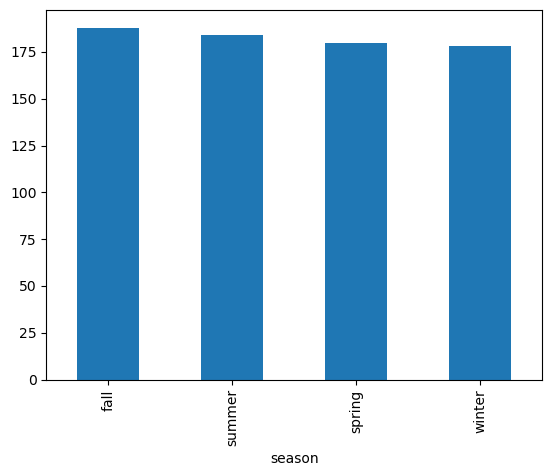

In [763]:
# Bar graph to analyse Seasonal bike sharing
bike['season'].value_counts().plot(kind = 'bar')

**fall has highest number of bike sharings.**

<Axes: xlabel='weathersit'>

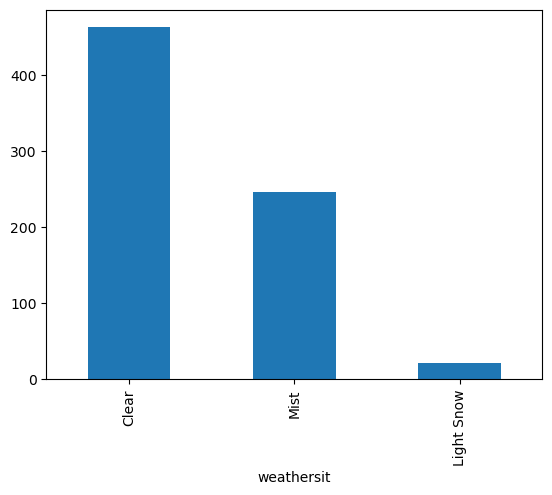

In [766]:
# Bar graph to analyse weathersit bike sharing
bike['weathersit'].value_counts().plot(kind = 'bar')

**Most of the bike sharings happening while there is a clear clouds.**
**There are no bike sharing when there is heavy rain.**

<Axes: xlabel='mnth'>

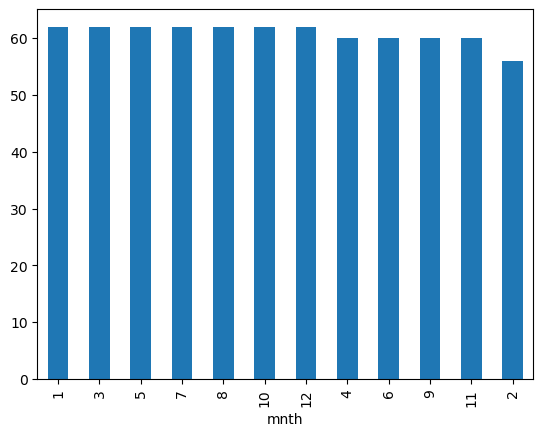

In [769]:
# Bar graph to analyse month wise bike sharing
bike['mnth'].value_counts().plot(kind = 'bar')

**Comparitively February has less number of bike shares, as there is less number of days in February. This might be the cause.**

<Axes: xlabel='weekday'>

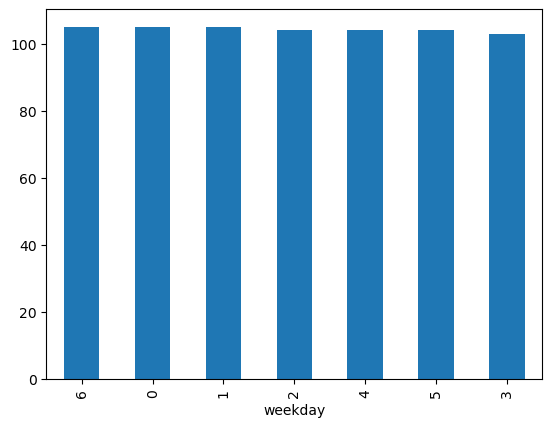

In [772]:
# Bar graph to analyse bike sharing on the day of week
bike['weekday'].value_counts().plot(kind = 'bar')

**All most all the days have equal number of bike shares.**

### Multivariate Analysis

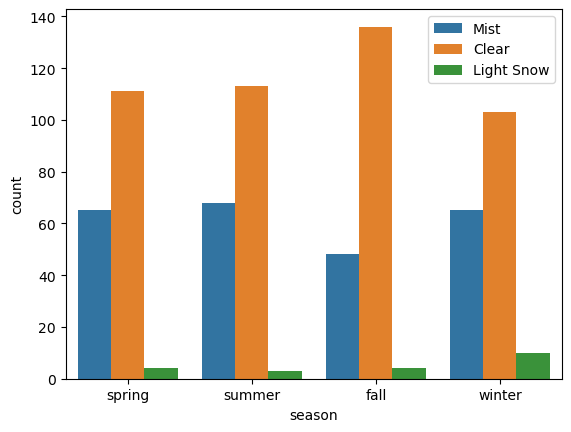

In [776]:
# Analysing data season wise based on weathersit
sns.countplot(x='season', hue='weathersit', data=bike)
plt.legend(bbox_to_anchor=(1, 1))

**Most of the bike sharing happend on Fall and clear clouds are there.**

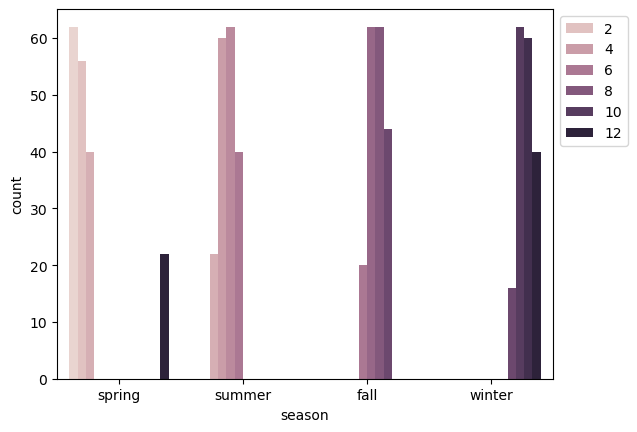

In [779]:
# Analysing data season wise based on month
sns.countplot(x='season', hue='mnth', data=bike)
plt.legend(bbox_to_anchor=(1, 1))

**This graph or plot won't define anything as the seasons occurs in different months in an year.**

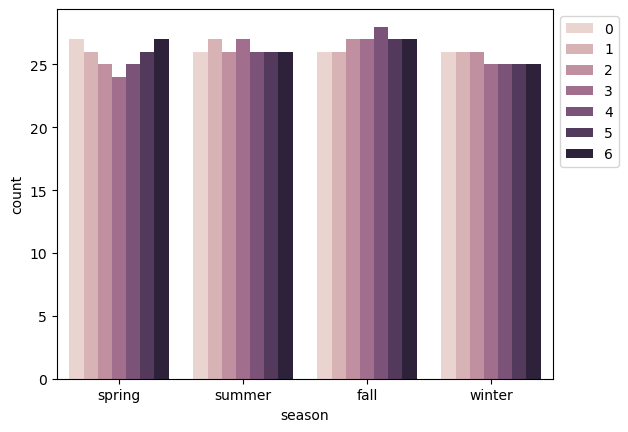

In [782]:
# Analysing data season wise based on weakly
sns.countplot(x='season', hue='weekday', data=bike)
plt.legend(bbox_to_anchor=(1, 1))

### Multivariate Analysis

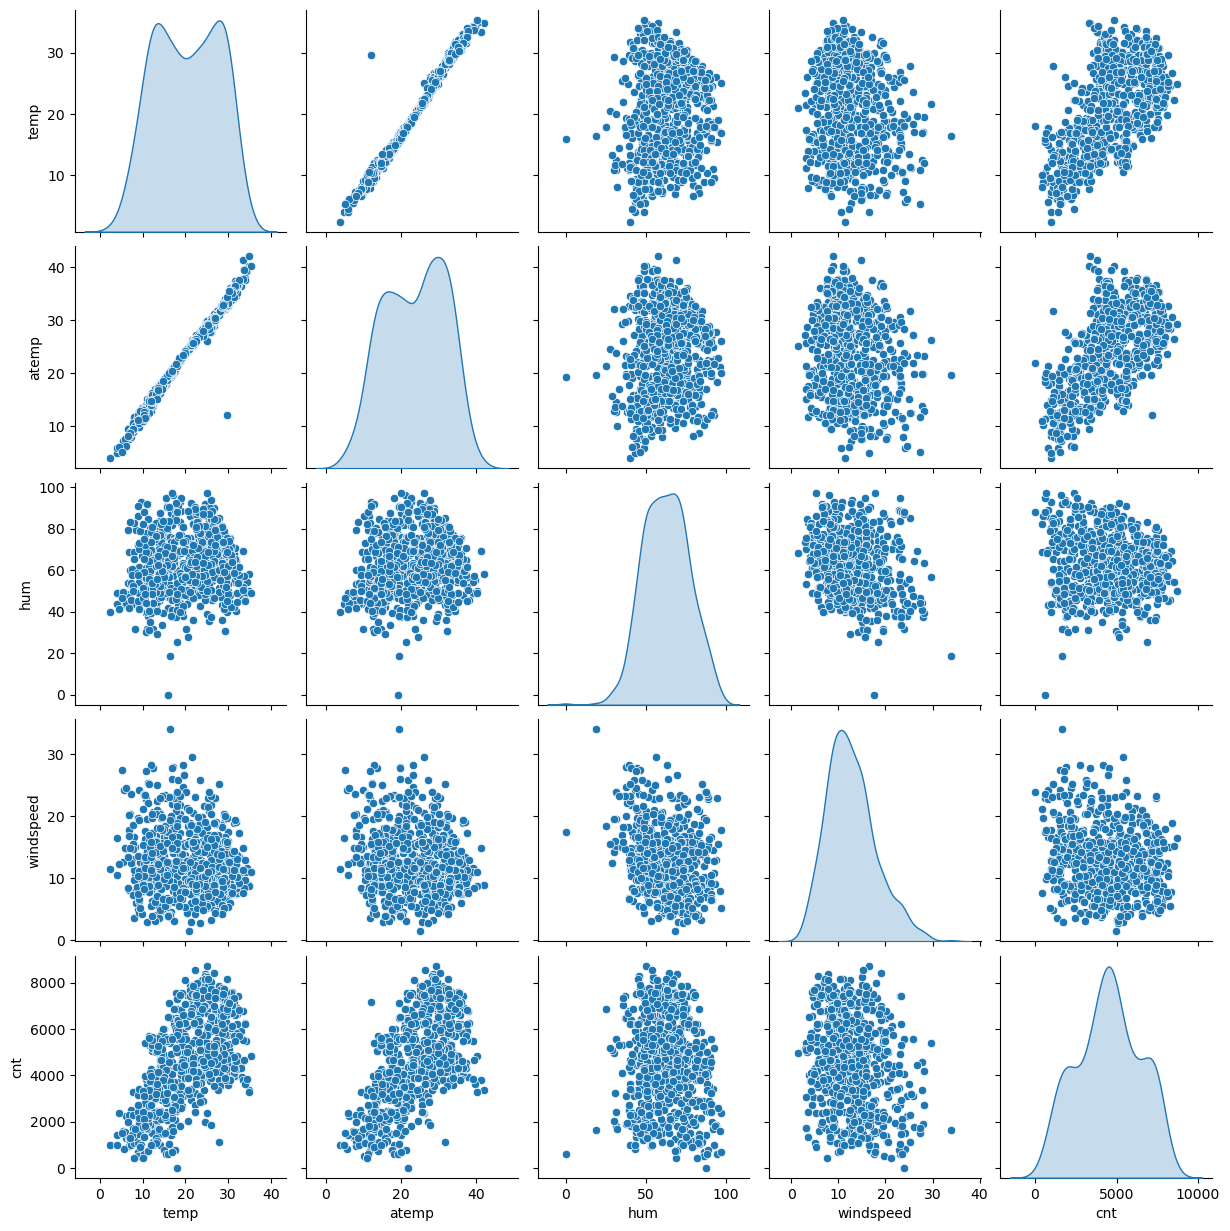

In [785]:
bike_num=bike[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

**From the above plot temp and atemp are dependent on each other.<br>**
**cnt is also related with temp and atemp**

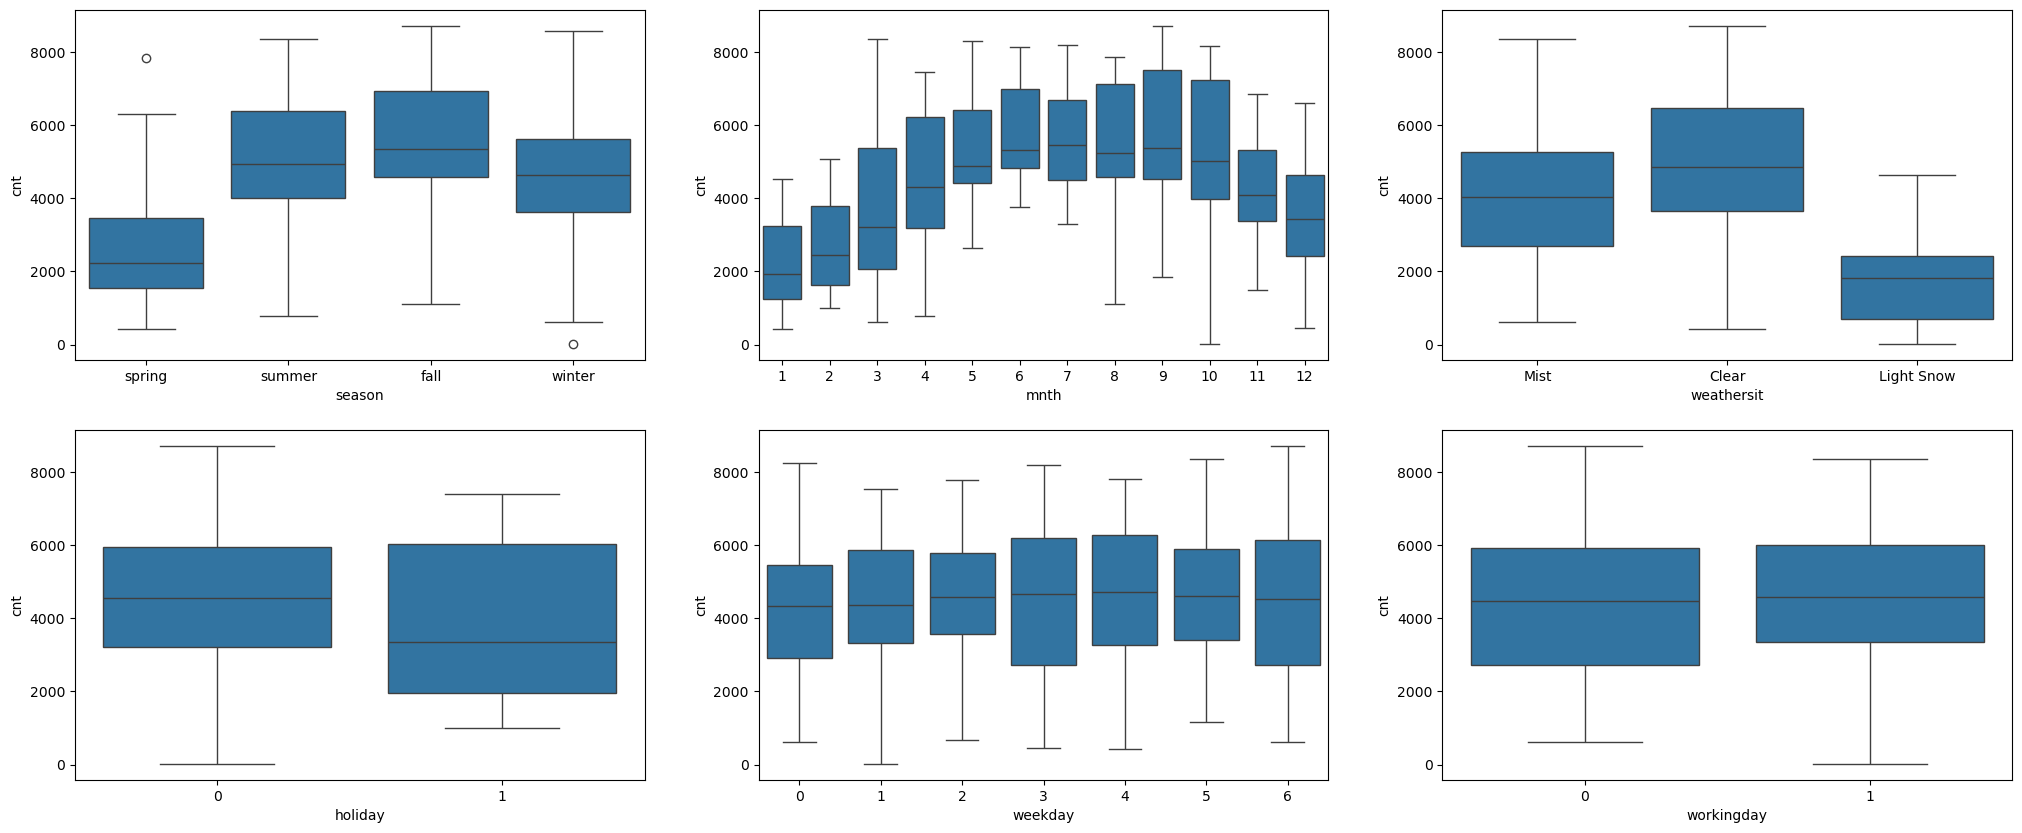

In [787]:
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

### Insights
There were 6 categorical variables in the dataset. 

We used Box plot (refer the fig above) to study their effect on the dependent variable (‘cnt’) . 

The inference that We could derive were: 
- **season**: Almost 32% of the bike booking were happening in season3 with a median of over 5000 booking (for the period of 2 years). This was followed by season2 & season4 with 27% & 25% of total booking. This indicates, season can be a good predictor for the dependent variable.

- **mnth**: Almost 10% of the bike booking were happening in the months 5,6,7,8 & 9 with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable. 
- **weathersit**: Almost 67% of the bike booking were happening during ‘weathersit1 with a median of close to 5000 booking (for the period of 2 years). This was followed by weathersit2 with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.
- **holiday**: Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable. 
- **weekday**: weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be added or not.
- **workingday**: Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable

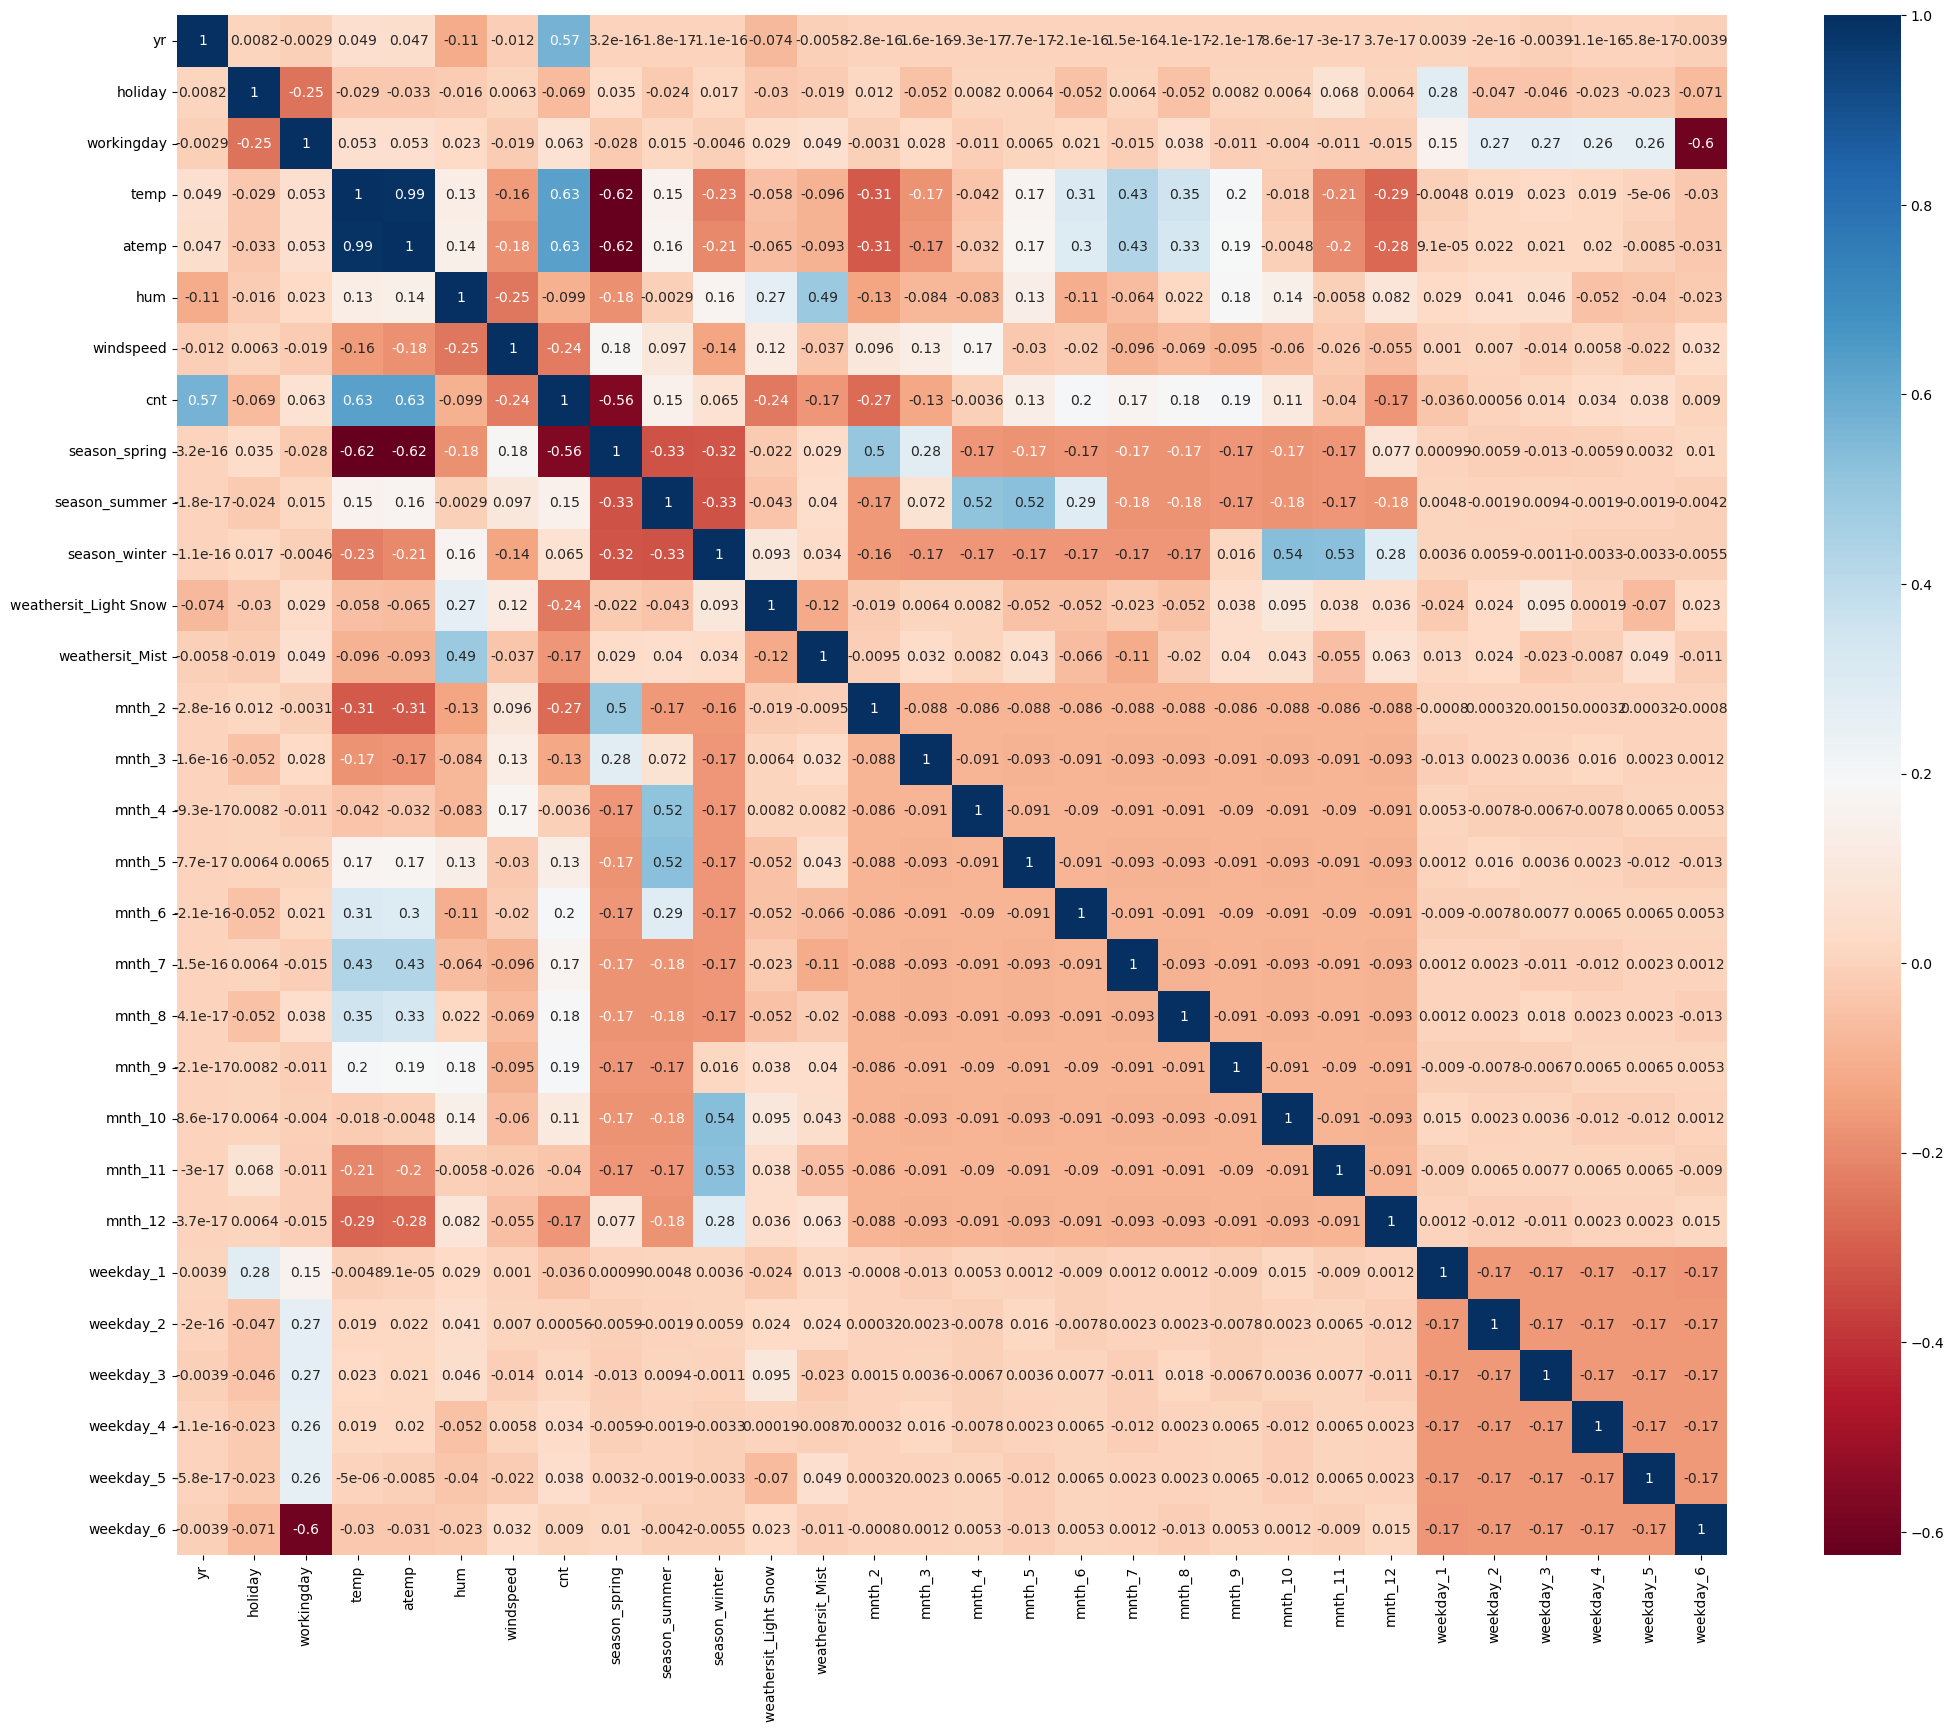

In [789]:
plt.figure(figsize = (25,20))
sns.heatmap(bike_updated.corr(), annot = True, cmap="RdBu")
plt.show()

## SPLITTING THE DATA
- Splitting the data to Train and Test: - We will now split the data into TRAIN and TEST (70:30 ratio) 
- We will use train_test_split method from sklearn package for this

In [794]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
bike_train,bike_test = train_test_split(bike_updated, train_size = 0.70, test_size = 0.30, random_state = 42)

In [796]:
# Checking the shape of train dataset
bike_train.shape

(510, 30)

In [798]:
bike_test.shape

(219, 30)

### Re-scaling

In [801]:
# rescaling the data by using min-max scaler to avoid biasness.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [803]:
# whenever we are applying fit_tranform it will return numpy array, the below code is used to convert numpy aray into pandas with column names
bike_train=pd.DataFrame(scaler.fit_transform(bike_train),columns=bike_train.columns)

In [805]:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,1.0,0.0,1.0,0.327133,0.322150,0.639330,0.327101,0.605336,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,1.0,0.0,0.403972,0.404998,0.731215,0.419004,0.609320,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.717562,0.685963,0.509660,0.708724,0.554026,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.331287,0.326273,0.785745,0.415925,0.088253,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.745598,0.682653,0.817947,0.110593,0.862127,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [807]:
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.521569,0.027451,0.668627,0.551091,0.526680,0.653801,0.414566,0.498206,0.231373,0.256863,...,0.090196,0.090196,0.092157,0.074510,0.149020,0.131373,0.139216,0.147059,0.129412,0.150980
std,0.500025,0.163554,0.471169,0.227401,0.213153,0.143542,0.185671,0.233905,0.422124,0.437332,...,0.286744,0.286744,0.289531,0.262857,0.356457,0.338139,0.346511,0.354512,0.335985,0.358381
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354176,0.352585,0.544033,0.281934,0.345950,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575824,0.564951,0.659296,0.383964,0.502233,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745338,0.698389,0.756762,0.525698,0.677080,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# BUILDING A LINEAR MODEL

### Dividing into X and Y sets for the model building

In [811]:
y_train = bike_train.pop('cnt')
X_train = bike_train

In [813]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [815]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)              
# running RFE
rfe = rfe.fit(X_train, y_train)

In [817]:
rfe

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [819]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 3),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', False, 15),
 ('season_spring', True, 1),
 ('season_summer', False, 11),
 ('season_winter', True, 1),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist', True, 1),
 ('mnth_2', False, 9),
 ('mnth_3', True, 1),
 ('mnth_4', False, 10),
 ('mnth_5', False, 2),
 ('mnth_6', False, 8),
 ('mnth_7', True, 1),
 ('mnth_8', False, 14),
 ('mnth_9', True, 1),
 ('mnth_10', False, 4),
 ('mnth_11', True, 1),
 ('mnth_12', True, 1),
 ('weekday_1', False, 13),
 ('weekday_2', False, 12),
 ('weekday_3', False, 7),
 ('weekday_4', False, 6),
 ('weekday_5', False, 5),
 ('weekday_6', True, 1)]

In [821]:
RFEcol = X_train.columns[rfe.support_]
RFEcol

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'season_spring',
       'season_winter', 'weathersit_Light Snow', 'weathersit_Mist', 'mnth_3',
       'mnth_7', 'mnth_9', 'mnth_11', 'mnth_12', 'weekday_6'],
      dtype='object')

In [823]:
NotRFEcol = X_train.columns[~rfe.support_]
NotRFEcol

Index(['holiday', 'windspeed', 'season_summer', 'mnth_2', 'mnth_4', 'mnth_5',
       'mnth_6', 'mnth_8', 'mnth_10', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5'],
      dtype='object')

In [825]:
X_train_rfe = X_train[RFEcol]

In [829]:
X_train_rfe.head()

,yr,workingday,temp,atemp,hum,season_spring,season_winter,weathersit_Light Snow,weathersit_Mist,mnth_3,mnth_7,mnth_9,mnth_11,mnth_12,weekday_6
0,1.0,1.0,0.327133,0.322150,0.639330,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.403972,0.404998,0.731215,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.717562,0.685963,0.509660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.331287,0.326273,0.785745,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,1.0,0.745598,0.682653,0.817947,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


**In the above we find out the 15 variables which are used for our model building.**

#### Now we will use stats library inorder find the best fit variables from the remaining variables.

# Building Linear Model using 'STATS MODEL'

### Model 1

#### VIF Check

In [836]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,1171.60
2,temp,1123.69
4,hum,25.54
1,workingday,4.53
6,season_winter,2.78
5,season_spring,2.54
8,weathersit_Mist,2.26
0,yr,2.08
12,mnth_11,1.82
14,weekday_6,1.75


In [838]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [840]:
lr1.params

const                    0.207735
yr                       0.238056
workingday               0.046945
temp                    -0.208681
atemp                    0.696579
hum                     -0.115241
season_spring           -0.153092
season_winter            0.096102
weathersit_Light Snow   -0.251225
weathersit_Mist         -0.065733
mnth_3                   0.050566
mnth_7                  -0.049180
mnth_9                   0.061236
mnth_11                 -0.084908
mnth_12                 -0.060801
weekday_6                0.052716
dtype: float64

In [842]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     170.0
Date:                Mon, 24 Feb 2025   Prob (F-statistic):          5.68e-184
Time:                        07:39:52   Log-Likelihood:                 481.51
No. Observations:                 510   AIC:                            -931.0
Df Residuals:                     494   BIC:                            -863.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.20

### Model 2

**Removing temp as it has high VIF value and p-value as well.**

In [846]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

In [848]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,24.41
2,temp,16.87
1,workingday,4.52
5,season_winter,2.75
4,season_spring,2.50
7,weathersit_Mist,2.22
0,yr,2.08
11,mnth_11,1.82
13,weekday_6,1.75
9,mnth_7,1.47


In [850]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [852]:
lr2.params

const                    0.205238
yr                       0.238389
workingday               0.048516
temp                     0.438124
hum                     -0.095136
season_spring           -0.156593
season_winter            0.100106
weathersit_Light Snow   -0.267266
weathersit_Mist         -0.069792
mnth_3                   0.055672
mnth_7                  -0.049242
mnth_9                   0.057866
mnth_11                 -0.085447
mnth_12                 -0.058954
weekday_6                0.053595
dtype: float64

In [854]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     179.3
Date:                Mon, 24 Feb 2025   Prob (F-statistic):          1.64e-183
Time:                        07:40:18   Log-Likelihood:                 477.69
No. Observations:                 510   AIC:                            -925.4
Df Residuals:                     495   BIC:                            -861.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.20

### Model 3

**hum has high VIF. So dropping the column.**

In [858]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [860]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.88
1,workingday,4.43
4,season_winter,2.40
0,yr,2.08
10,mnth_11,1.77
12,weekday_6,1.72
6,weathersit_Mist,1.57
3,season_spring,1.56
8,mnth_7,1.43
11,mnth_12,1.33


In [862]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [864]:
lr3.params

const                    0.159009
yr                       0.241294
workingday               0.049495
temp                     0.419641
season_spring           -0.159277
season_winter            0.095065
weathersit_Light Snow   -0.292659
weathersit_Mist         -0.084895
mnth_3                   0.057708
mnth_7                  -0.046304
mnth_9                   0.053489
mnth_11                 -0.085442
mnth_12                 -0.062870
weekday_6                0.054769
dtype: float64

In [866]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.7
Date:                Mon, 24 Feb 2025   Prob (F-statistic):          2.26e-183
Time:                        07:40:45   Log-Likelihood:                 474.62
No. Observations:                 510   AIC:                            -921.2
Df Residuals:                     496   BIC:                            -862.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.15

### Model 4

**Here I am removing mnth_7 variable eventhough it has low VIF, it has high p-value compared to temp. So I am keeping temp.**

In [871]:
X_train_new = X_train_new.drop(["mnth_7"], axis = 1)

In [873]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.83
1,workingday,4.36
4,season_winter,2.35
0,yr,2.08
9,mnth_11,1.77
11,weekday_6,1.70
3,season_spring,1.56
6,weathersit_Mist,1.55
10,mnth_12,1.33
8,mnth_9,1.18


In [875]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [877]:
lr4.params

const                    0.173474
yr                       0.240672
workingday               0.051373
temp                     0.383599
season_spring           -0.164973
season_winter            0.096894
weathersit_Light Snow   -0.295535
weathersit_Mist         -0.083363
mnth_3                   0.060303
mnth_9                   0.062247
mnth_11                 -0.089345
mnth_12                 -0.065864
weekday_6                0.056385
dtype: float64

In [879]:
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     203.5
Date:                Mon, 24 Feb 2025   Prob (F-statistic):          5.51e-183
Time:                        07:42:52   Log-Likelihood:                 470.94
No. Observations:                 510   AIC:                            -915.9
Df Residuals:                     497   BIC:                            -860.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.17

### Model 5

**Removing mnth_3**

In [891]:
X_train_new = X_train_new.drop(["mnth_3"], axis = 1)

In [893]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.83
1,workingday,4.33
4,season_winter,2.35
0,yr,2.08
8,mnth_11,1.77
10,weekday_6,1.70
6,weathersit_Mist,1.54
3,season_spring,1.48
9,mnth_12,1.32
7,mnth_9,1.18


In [895]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [897]:
lr5.params

const                    0.178284
yr                       0.241211
workingday               0.053151
temp                     0.378031
season_spring           -0.159358
season_winter            0.094423
weathersit_Light Snow   -0.289853
weathersit_Mist         -0.080954
mnth_9                   0.059561
mnth_11                 -0.091460
mnth_12                 -0.072304
weekday_6                0.055136
dtype: float64

In [899]:
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.9
Date:                Mon, 24 Feb 2025   Prob (F-statistic):          6.25e-182
Time:                        08:05:33   Log-Likelihood:                 465.64
No. Observations:                 510   AIC:                            -907.3
Df Residuals:                     498   BIC:                            -856.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1783      0.026      6.866      0.000       0.127       0.229
yr                        0.2412      0.009     27.539      0.000       0.224       0.258
workingday                0.0532      0.012      4.562      0.000       0.030       0.076
temp                      0.3780      0.033     11.609      0.000       0.314       0.442
season_spring            -0.1594      0.017     -9.205      0.000      -0.193      -0.125
season_winter             0.0944      0.015      6.458      0.000       0.066       0.123
weathersit_Light Snow    -0.2899      0.026    -10.975      0.000      -0.342      -0.238
weathersit_Mist          -0.0810      0.009     -8.659      0.000      -0.099      -0.063
mnth_9                    0.0596      0.016      3.789      0.000       0.029       0.090
mnth_11                  -0.0915      0.020     -4.643      0.000      -0.130      -0.053
mnth_12                  -0.0723      0.019     -3.896      0.000      -0.109      -0.036
weekday_6                 0.0551      0.015      3.613      0.000       0.025       0.085
==============================================================================
Omnibus:                       80.033   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.072
Skew:                          -0.797   Prob(JB):                     2.18e-44
Kurtosis:                       5.631   Cond. No.                         15.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [901]:
corre=X_train_new.corr()

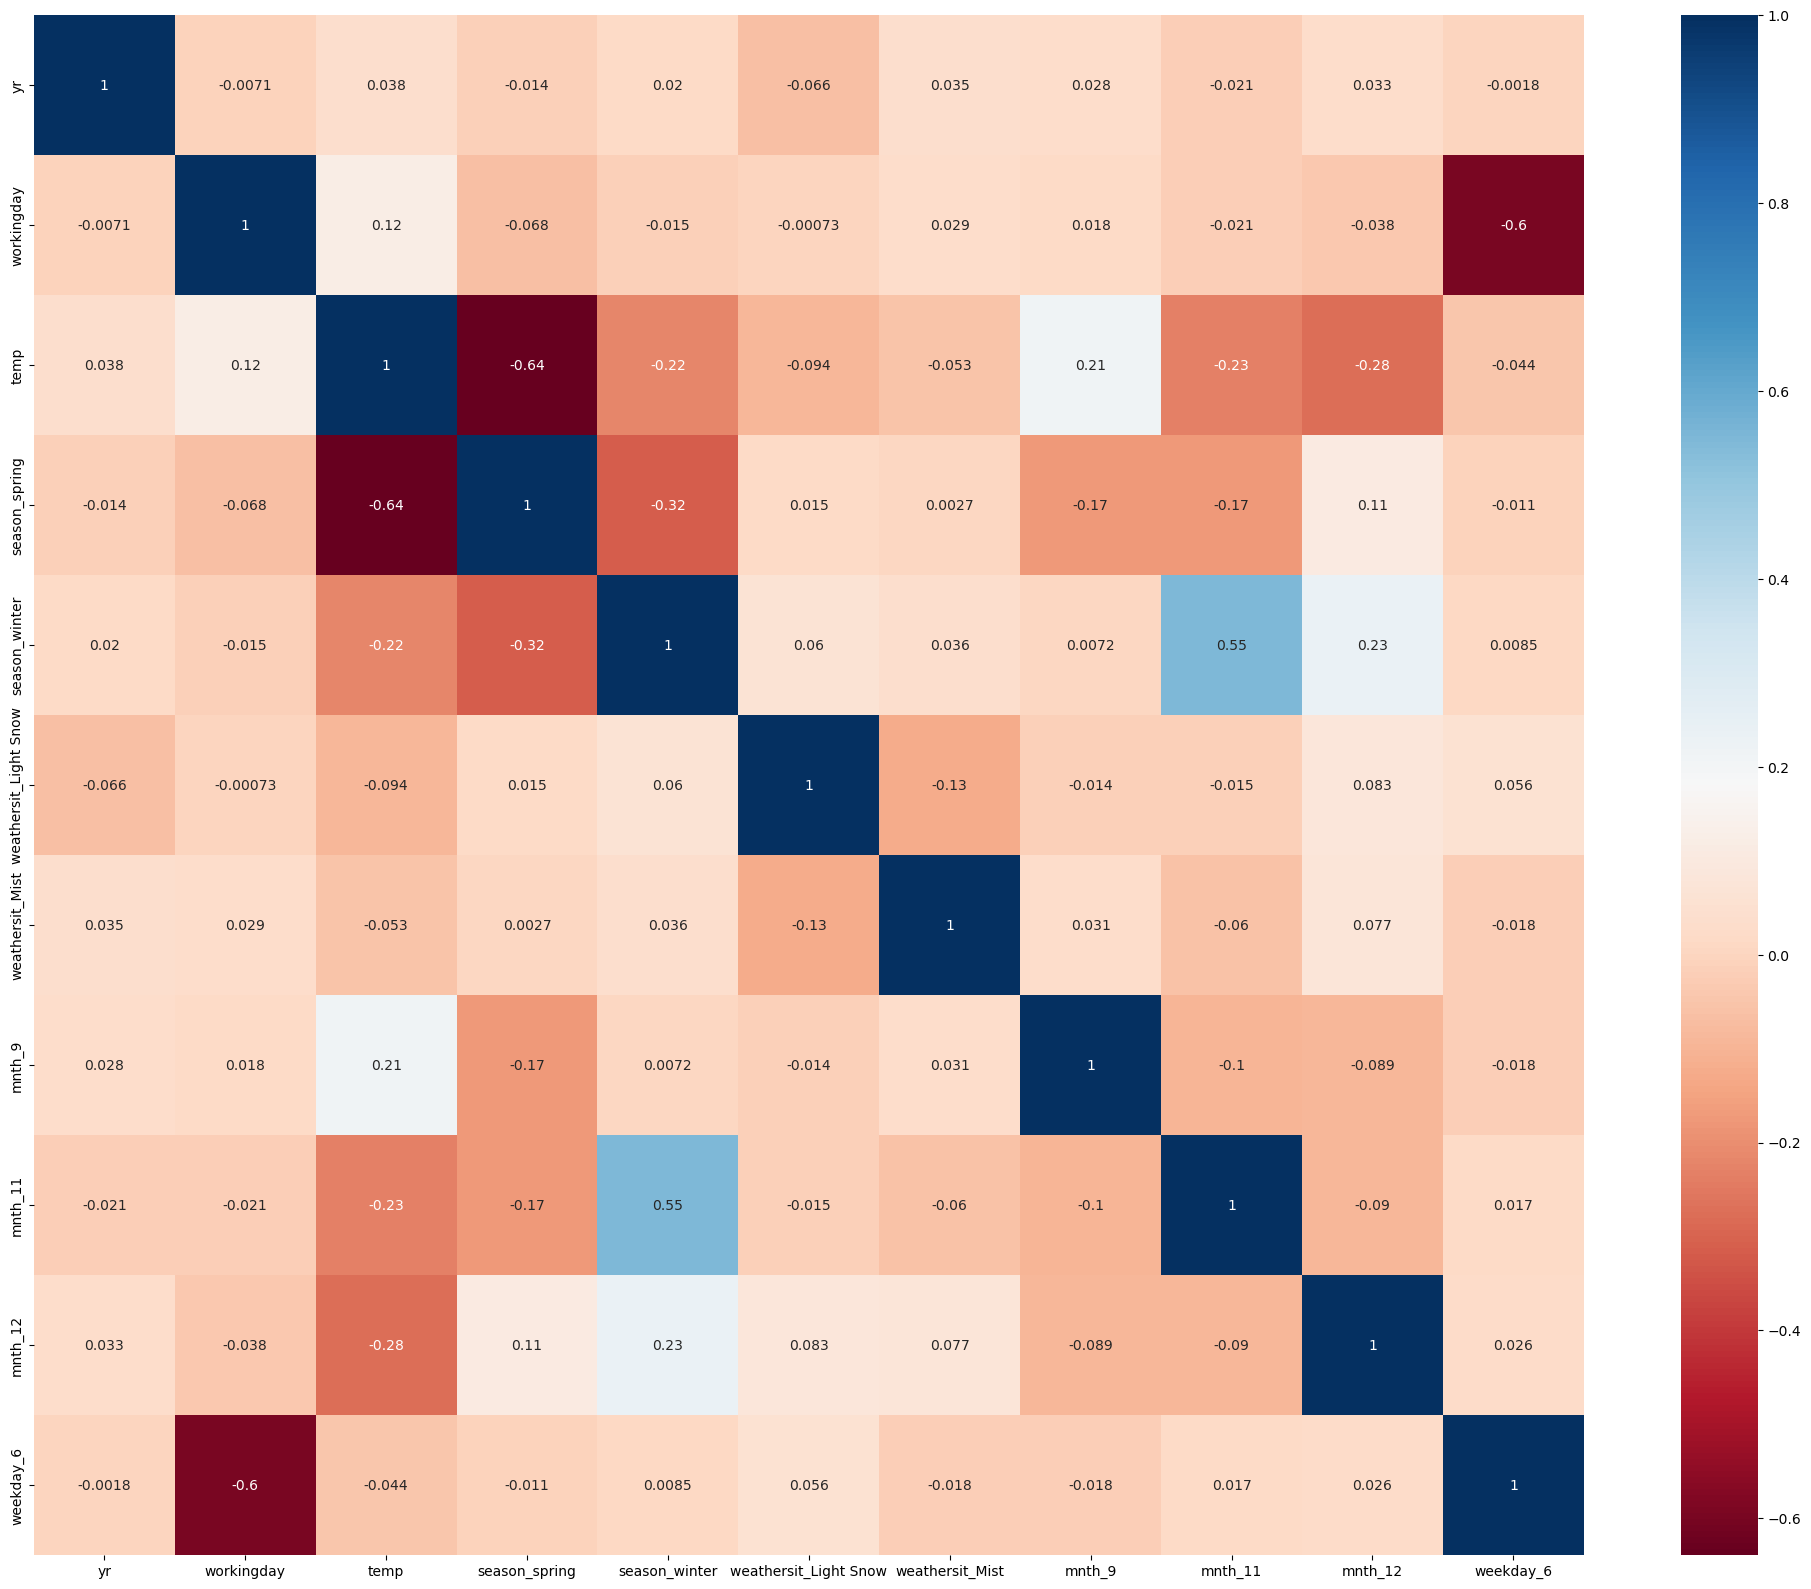

In [903]:
plt.figure(figsize = (25,20))
sns.heatmap(X_train_new.corr(), annot = True, cmap="RdBu")
plt.show()

## The equation of best fitted surface based on model lr5:

**0.178284+(yr x 0.241211)+(workingday x 0.053151)+(temp x 0.378031)+(season_spring x -0.159358)+(season_winter x 0.094423)+(weathersit_Light Snow x -0.289853)+(weathersit_Mist x -0.080954)+(mnth_9 x 0.059561)+(mnth_11 x -0.091460)+(mnth_12 x -0.072304)+(weekday_6 x 0.055136).**

# ASSUMPTIONS

## Error terms are normally distributed with mean zero (not X, Y)
- Residual Analysis Of Training Data

In [907]:
y_train_pred = lr5.predict(X_train_lm5)

Text(0.5, 0, 'Errors')

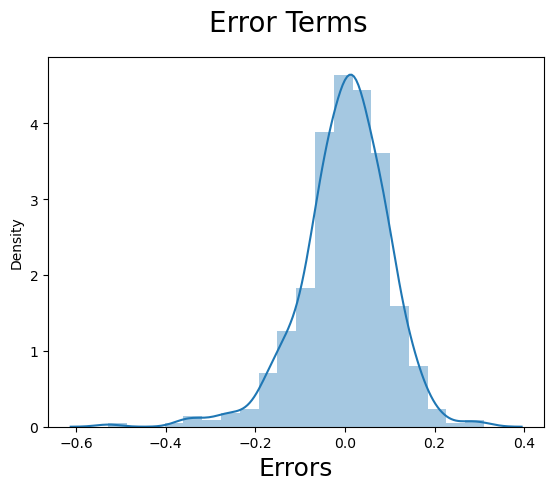

In [909]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

# MAKING PREDICTION USING FINAL MODEL

Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr5)

### Applying the scaling on the test sets

In [914]:
bike_test=pd.DataFrame(scaler.transform(bike_test),columns=bike_test.columns)

In [916]:
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,1.0,0.0,0.0,0.543115,0.536771,0.518248,0.422104,0.848606,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.758058,0.704203,0.843709,0.479765,0.526017,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.324018,0.317998,0.642765,0.386287,0.350115,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.453814,0.455552,0.780592,0.062325,0.318363,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.773634,0.724915,0.507943,0.433030,0.833877,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [918]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.452055,0.031963,0.716895,0.527468,0.501760,0.629546,0.435511,0.479553,0.283105,0.237443,...,0.063927,0.073059,0.059361,0.109589,0.132420,0.168950,0.141553,0.132420,0.173516,0.127854
std,0.498836,0.176306,0.451539,0.229936,0.215759,0.152584,0.212750,0.233091,0.451539,0.426491,...,0.245183,0.260830,0.236840,0.313092,0.339723,0.375566,0.349389,0.339723,0.379560,0.334692
min,0.000000,0.000000,0.000000,0.047675,0.051010,0.193646,0.060760,-0.049378,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.324018,0.314694,0.520479,0.281156,0.285826,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.507811,0.496145,0.608416,0.416900,0.471206,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.726388,0.685028,0.735901,0.534288,0.644151,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.970925,0.939531,1.002146,1.214955,0.980804,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test

In [921]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [923]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     219 non-null    float64
 1   holiday                219 non-null    float64
 2   workingday             219 non-null    float64
 3   temp                   219 non-null    float64
 4   atemp                  219 non-null    float64
 5   hum                    219 non-null    float64
 6   windspeed              219 non-null    float64
 7   season_spring          219 non-null    float64
 8   season_summer          219 non-null    float64
 9   season_winter          219 non-null    float64
 10  weathersit_Light Snow  219 non-null    float64
 11  weathersit_Mist        219 non-null    float64
 12  mnth_2                 219 non-null    float64
 13  mnth_3                 219 non-null    float64
 14  mnth_4                 219 non-null    float64
 15  mnth_5

In [925]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm5 = sm.add_constant(X_test)
X_test_lm5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   const                  219 non-null    float64
 1   yr                     219 non-null    float64
 2   workingday             219 non-null    float64
 3   temp                   219 non-null    float64
 4   season_spring          219 non-null    float64
 5   season_winter          219 non-null    float64
 6   weathersit_Light Snow  219 non-null    float64
 7   weathersit_Mist        219 non-null    float64
 8   mnth_9                 219 non-null    float64
 9   mnth_11                219 non-null    float64
 10  mnth_12                219 non-null    float64
 11  weekday_6              219 non-null    float64
dtypes: float64(12)
memory usage: 20.7 KB


In [927]:
# Making predictions using the final model (lr5)

y_pred = lr5.predict(X_test_lm5)

# MODEL EVALUATION

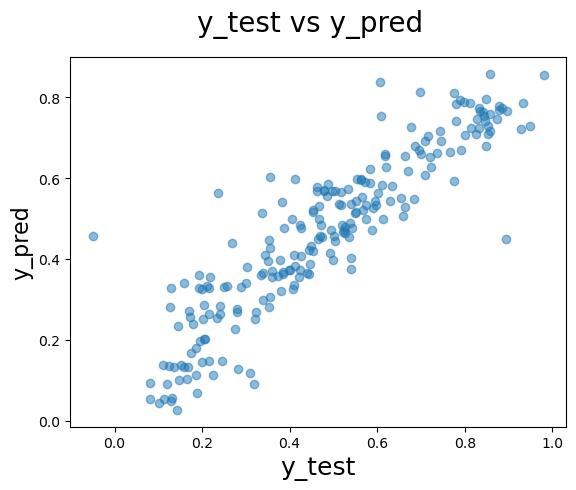

In [930]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

 # R^2 Value for TEST

In [940]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8133138015630351

## Adjusted R^2 Value for TEST

In [943]:
# We already have the value of R^2 (calculated in above step)

r2=0.8133138015630351

In [945]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8033932789407809

In [949]:
X_test.shape

(219, 11)

# Final Result Comparison

- Train R^2 :0.827
- Train Adjusted R^2 :0.823
- Test R^2 :0.813
- Test Adjusted R^2 :0.803

As per our final Model, the top 3 predictor variables that influences the bike booking are: 
- **Temperature (temp)** - A coefficient value of ‘0.378031’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.378031 units. 
- **weathersit_Light Snow** - A coefficient value of ‘ -0.289853’ indicated that, a unit increase in weathersit_Light Snow variable decreases the bike hire numbers by  -0.289853 units.
- **Year (yr)** - A coefficient value of ‘0.241211’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.241211 units. 

#### So, it's suggested to consider these variables utmost importance while planning, to achive maximum Booking

The next best features that can also be considered are 
- **season_spring:** - A coefficient value of ‘-0.159358’ indicated that a unit increase in season_spring variable increases the bike hire numbers by -0.159358 units.